saving image to /Users/kpmurphy/github/bookv2/figures/regression_tree_surface.pdf
Figure size: [14. 14.]


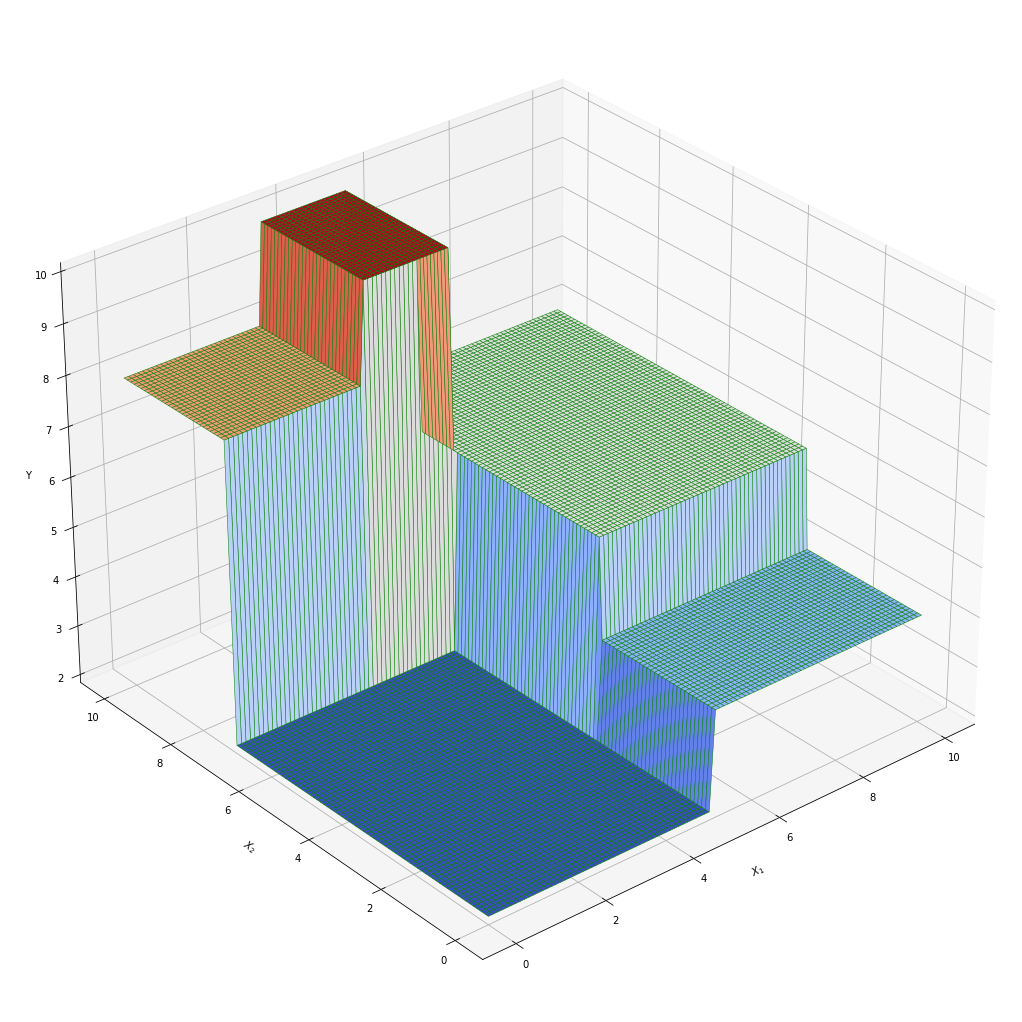

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# from mpl_toolkits.mplot3d import axes3d
# from mpl_toolkits.mplot3d import Axes3D

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

import os

os.environ["FIG_DIR"] = "/Users/kpmurphy/github/bookv2/figures"

x11 = 5
x12 = 3
x21 = 7
x22 = 3

r = np.arange(2, 12, 2)
h = 0.1
M = 10

X1 = X2 = np.arange(0, M + h, h)
tree = np.zeros((len(X1), len(X2)))

L1 = X1 <= x11
R1 = X2 <= x21

L2 = X1 > x11
R2 = X2 <= x22

L3 = X1 > x11
R3 = X2 > x22

L4 = X1 <= min(x11, x22)
R4 = X2 > x21

L5 = (X1 <= x11) & (X1 > x12)
R5 = X2 > x21

for i in range(len(tree)):
    for j in range(len(tree[0])):
        if L1[i] & R1[j]:
            tree[i, j] = r[0]
        if L2[i] & R2[j]:
            tree[i, j] = r[1]
        if L3[i] & R3[j]:
            tree[i, j] = r[2]
        if L4[i] & R4[j]:
            tree[i, j] = r[3]
        if L5[i] & R5[j]:
            tree[i, j] = r[4]

# colors = np.array([[255, 0, 0], [0, 0, 255], [160, 32, 240], [0, 100, 0], [255, 140, 0]]) / 255

# https://github.com/probml/pml-book/issues/499
# X, Y = np.meshgrid(X1, X2)
X, Y = np.meshgrid(X1, X2, indexing="ij")

Z = tree
# fig = plt.figure(figsize=(14,14))
# ax = fig.gca(projection="3d")
ax = plt.figure(figsize=(14, 14)).add_subplot(projection="3d")
# https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html

ax.plot_surface(X, Y, Z, cmap="coolwarm", lw=0.5, rstride=1, cstride=1, edgecolor=["g"], color="w", antialiased=True)
# ax.plot_surface(X, Y, Z, cmap="jet", lw=0.5, rstride=1, cstride=1, edgecolor =['g'], color='w',antialiased=True)
# ax.plot_surface(X, Y, Z, cmap="tab10", lw=0.5, rstride=1, cstride=1, antialiased=True)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("Y")
ax.view_init(None, 50 + 180)
plt.tight_layout()
pml.savefig("regression_tree_surface", dpi=300)
plt.show()

In [12]:
print(r)

[ 2  4  6  8 10]
